## DATASET DESCRIPTION

The data set utilized in this analysis seems to be associated with government records of network performance, i.e., mobile network speeds for different telecom operators and geographic locations. The data was imported from an Excel file titled "govt dataset.xlsx", indicating that it holds structured data, perhaps gathered from telecom infrastructure tests or user-reported speed test reports. The data set must have fields like network type (e.g., 3G, 4G, 5G), names of telecom operators, download/upload speeds (in kb/s), ping time (latency in milliseconds), and geographical areas (telecom circles or zones).
The key goal of this analysis was to investigate, cleanse, and graph the dataset in order to uncover insightful information regarding network performance. The first action was to load the dataset and conduct simple exploratory data analysis (EDA) to get to know its organization. This was done by detecting missing values, determining the types of variables, and summarizing the most important statistical characteristics of numerical columns such as speed and latency.
After understanding the overall structure of the dataset, the next task was to conduct in-depth analysis to identify patterns and trends. The aim was to identify which telecom operators offered the best speeds, how various network types fared, how speed and latency were related, and if there were any discernible geographical variations in network quality. This was achieved using statistical analysis, correlation studies, and visualizations.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_excel(r"govt dataset.xlsx")

In [7]:
df

,Unnamed: 0,operator,network,type,kb/s,ping,Circle,month,year
0,0,AIRTEL,4G,download,41001,-101,Delhi,April,2023
1,1,JIO,4G,download,20495,-76,UP West,May,2023
2,2,JIO,4G,upload,109,na,Maharashtra,Sep,2023
3,3,CELLONE,3G,download,918,-67,Madhya Pradesh,Aug,2023
4,4,JIO,4G,upload,5627,-96,Haryana,May,2023
...,...,...,...,...,...,...,...,...,...
1507,1507,JIO,4G,upload,1253,-77,NaN,Feb,2023
1508,1508,AIRTEL,4G,upload,16259,-78,Haryana,June,2023
1509,1509,AIRTEL,4G,download,8936,-97,Mumbai,May,2023
1510,1510,AIRTEL,4G,download,1666,na,NaN,March,2023


In [8]:
df.describe()

,Unnamed: 0,kb/s,year
count,1512.000000,1512.000000,1512.0
mean,755.500000,12976.336640,2023.0
std,436.621117,17162.196197,0.0
min,0.000000,22.000000,2023.0
25%,377.750000,1935.000000,2023.0
50%,755.500000,6795.000000,2023.0
75%,1133.250000,16694.500000,2023.0
max,1511.000000,132499.000000,2023.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1512 non-null   int64 
 1   operator    1512 non-null   object
 2   network     1512 non-null   object
 3   type        1512 non-null   object
 4   kb/s        1512 non-null   int64 
 5   ping        1512 non-null   object
 6   Circle      1236 non-null   object
 7   month       1512 non-null   object
 8   year        1512 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 106.4+ KB


In [10]:
print(df.columns)


Index(['Unnamed: 0', 'operator', 'network', 'type', 'kb/s', 'ping', 'Circle',
       'month', 'year'],
      dtype='object')


# DataFrame Column Names

In [12]:
df.columns = df.columns.str.strip()


In [13]:
print(df.head())


   Unnamed: 0 operator network      type   kb/s  ping          Circle  month  \
0           0   AIRTEL      4G  download  41001  -101           Delhi  April   
1           1      JIO      4G  download  20495   -76         UP West    May   
2           2      JIO      4G    upload    109    na     Maharashtra    Sep   
3           3  CELLONE      3G  download    918   -67  Madhya Pradesh    Aug   
4           4      JIO      4G    upload   5627   -96         Haryana    May   

   year  
0  2023  
1  2023  
2  2023  
3  2023  
4  2023  


# Checking the null values

In [15]:
df.isnull().sum()


Unnamed: 0      0
operator        0
network         0
type            0
kb/s            0
ping            0
Circle        276
month           0
year            0
dtype: int64

# Drop unnecessary index column

In [38]:
df_cleaned = df.drop(columns=["Unnamed: 0"], errors='ignore')

In [40]:
df

,Unnamed: 0,operator,network,type,kb/s,ping,Circle,month,year
0,0,AIRTEL,4G,download,41001,-101,Delhi,April,2023
1,1,JIO,4G,download,20495,-76,UP West,May,2023
2,2,JIO,4G,upload,109,na,Maharashtra,Sep,2023
3,3,CELLONE,3G,download,918,-67,Madhya Pradesh,Aug,2023
4,4,JIO,4G,upload,5627,-96,Haryana,May,2023
...,...,...,...,...,...,...,...,...,...
1507,1507,JIO,4G,upload,1253,-77,NaN,Feb,2023
1508,1508,AIRTEL,4G,upload,16259,-78,Haryana,June,2023
1509,1509,AIRTEL,4G,download,8936,-97,Mumbai,May,2023
1510,1510,AIRTEL,4G,download,1666,na,NaN,March,2023


# "Convert 'ping' Column to Numeric Values, Invalid Entries Become NaN"

In [43]:
df_cleaned["ping"] = pd.to_numeric(df_cleaned["ping"], errors='coerce')

In [45]:
df_cleaned["Circle"] = df_cleaned["Circle"].fillna("Unknown")

In [47]:
months_order = ["Jan", "Feb", "Mar", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_cleaned["month"] = pd.Categorical(df_cleaned["month"], categories=months_order, ordered=True)

In [49]:
df_cleaned = df_cleaned.drop_duplicates()

In [51]:
sns.set_style("whitegrid")

In [53]:
df

,Unnamed: 0,operator,network,type,kb/s,ping,Circle,month,year
0,0,AIRTEL,4G,download,41001,-101,Delhi,April,2023
1,1,JIO,4G,download,20495,-76,UP West,May,2023
2,2,JIO,4G,upload,109,na,Maharashtra,Sep,2023
3,3,CELLONE,3G,download,918,-67,Madhya Pradesh,Aug,2023
4,4,JIO,4G,upload,5627,-96,Haryana,May,2023
...,...,...,...,...,...,...,...,...,...
1507,1507,JIO,4G,upload,1253,-77,NaN,Feb,2023
1508,1508,AIRTEL,4G,upload,16259,-78,Haryana,June,2023
1509,1509,AIRTEL,4G,download,8936,-97,Mumbai,May,2023
1510,1510,AIRTEL,4G,download,1666,na,NaN,March,2023


# Distribution of Download and Upload Speeds by Operator and Type

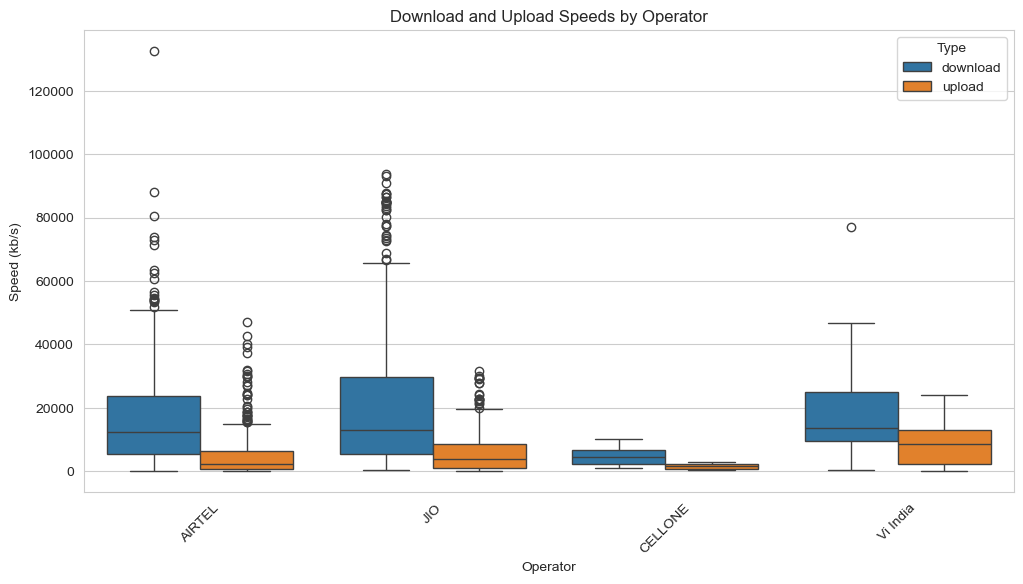

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="operator", y="kb/s", hue="type")
plt.xticks(rotation=45)
plt.title("Download and Upload Speeds by Operator")
plt.ylabel("Speed (kb/s)")
plt.xlabel("Operator")
plt.legend(title="Type")
plt.show()

# Distribution of Ping Times

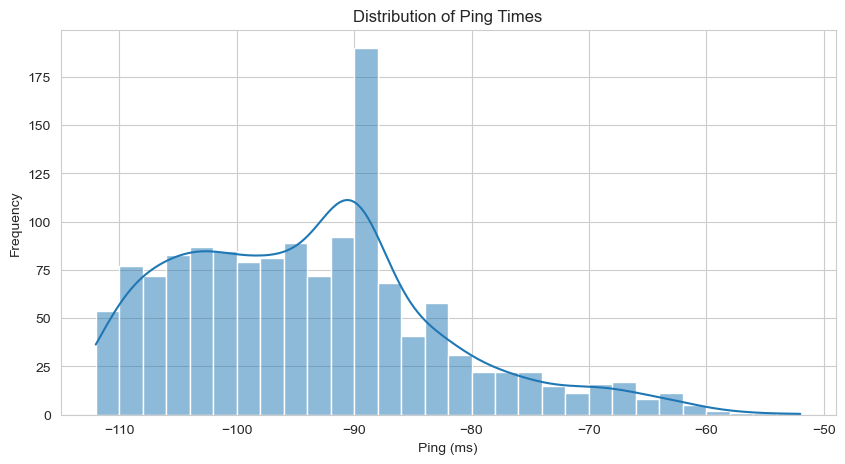

In [59]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["ping"].dropna(), bins=30, kde=True)
plt.title("Distribution of Ping Times")
plt.xlabel("Ping (ms)")
plt.ylabel("Frequency")
plt.show()

# Distribution of Network Types in the Dataset

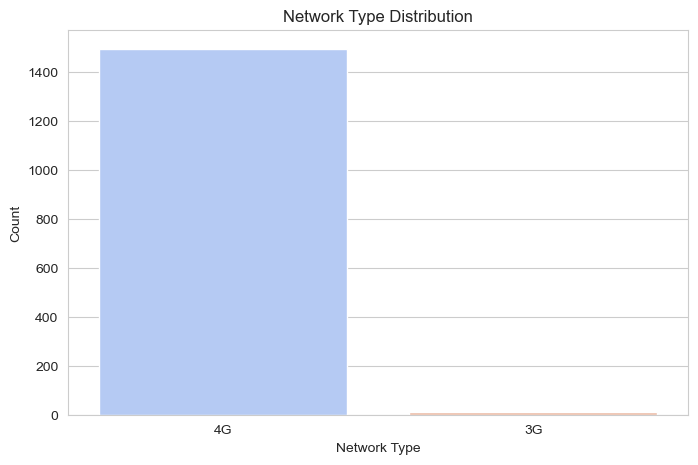

In [62]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="network", hue="network", palette="coolwarm", legend=False)
plt.title("Network Type Distribution")
plt.xlabel("Network Type")
plt.ylabel("Count")
plt.show()

# Distribution of Operators and Their Frequency in the Dataset

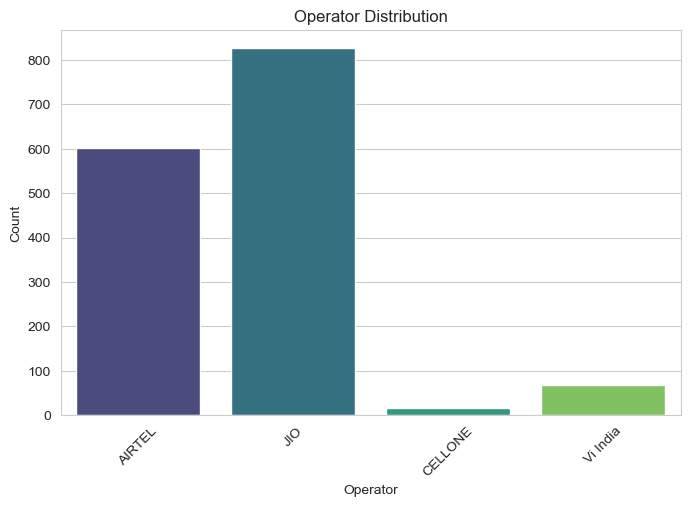

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="operator", hue="operator", palette="viridis", legend=False)
plt.title("Operator Distribution")
plt.xlabel("Operator")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Monthly Trend of Network Speeds by Operator

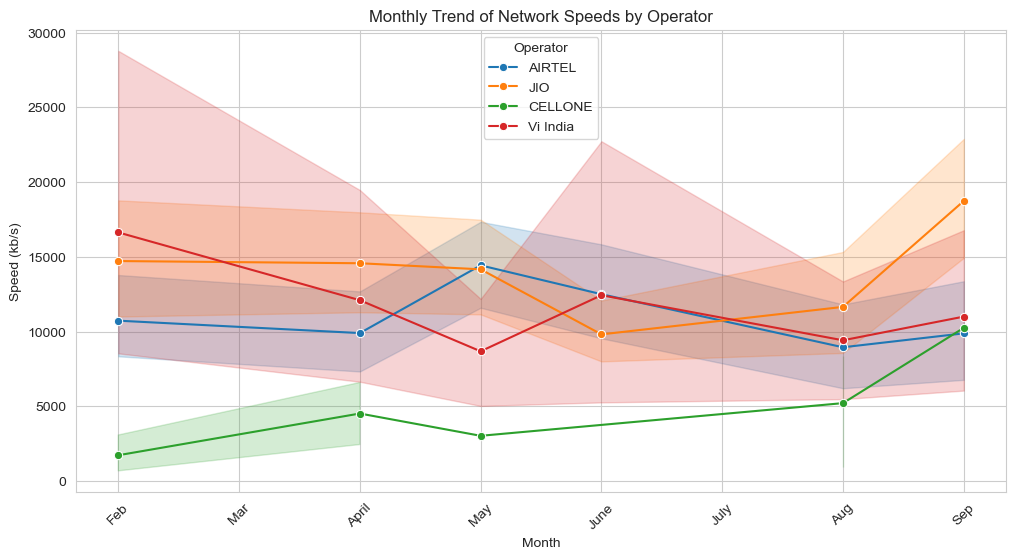

In [68]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x="month", y="kb/s", hue="operator", marker="o")
plt.title("Monthly Trend of Network Speeds by Operator")
plt.xlabel("Month")
plt.ylabel("Speed (kb/s)")
plt.xticks(rotation=45)
plt.legend(title="Operator")
plt.show()

In [69]:
df_cleaned["kb/s"] = pd.to_numeric(df_cleaned["kb/s"], errors="coerce")

In [72]:
df_cleaned = df_cleaned.dropna(subset=["kb/s"])

# "Network Type and Speed Distribution Overview"

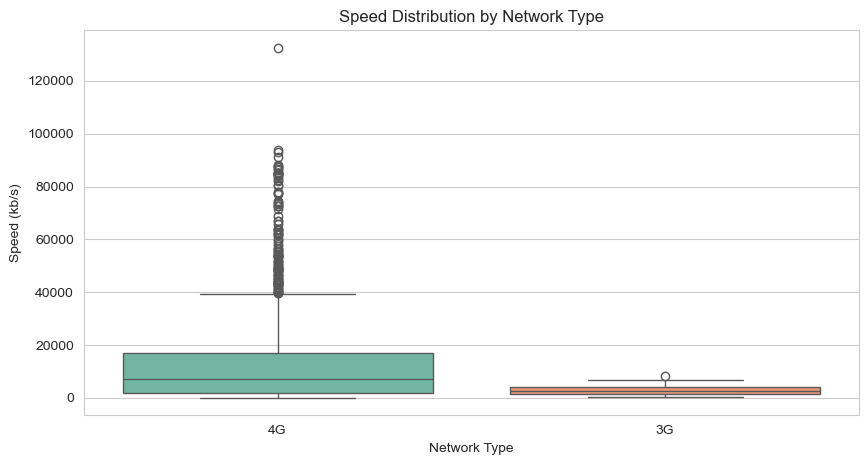

In [75]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x="network", y="kb/s", hue="network", palette="Set2", legend=False)
plt.title("Speed Distribution by Network Type")
plt.xlabel("Network Type")
plt.ylabel("Speed (kb/s)")
plt.show()

# Ping vs Speed Scatter Plot

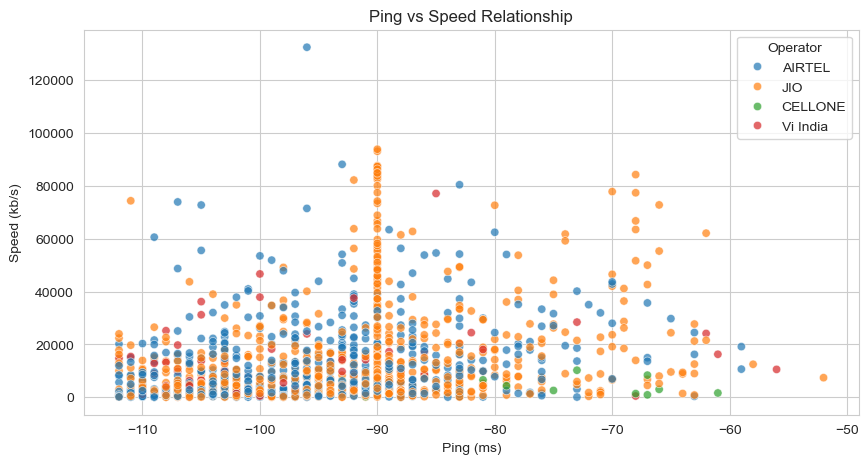

In [78]:

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_cleaned, x="ping", y="kb/s", hue="operator", alpha=0.7)
plt.title("Ping vs Speed Relationship")
plt.xlabel("Ping (ms)")
plt.ylabel("Speed (kb/s)")
plt.legend(title="Operator")
plt.show()

# "Distribution of Tests Conducted Across Different Circles"
# Test Count Breakdown by Circle"

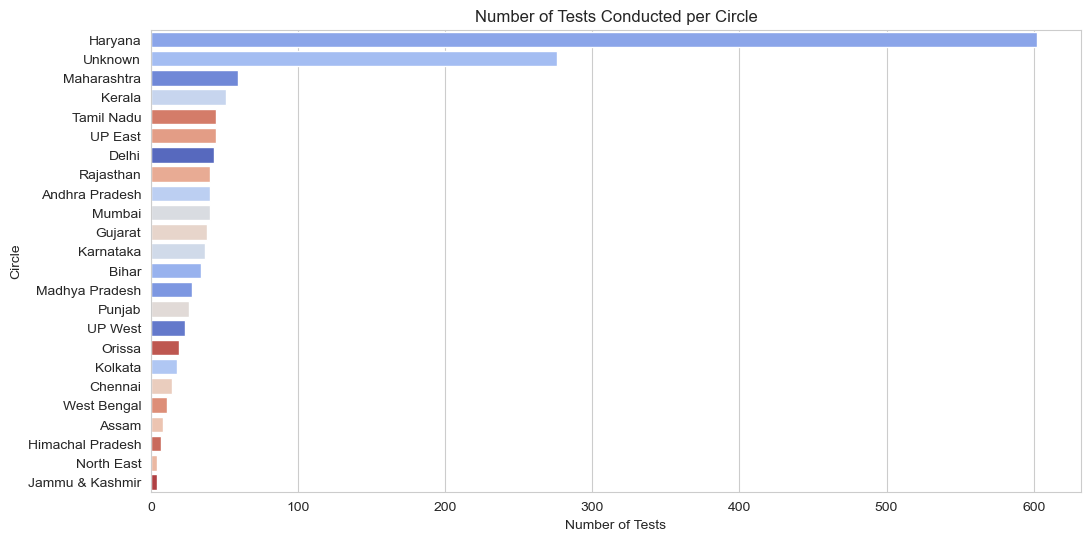

In [81]:
if df_cleaned["Circle"].nunique() > 0:
    plt.figure(figsize=(12, 6))
    sns.countplot(
        data=df_cleaned, 
        y="Circle", 
        order=df_cleaned["Circle"].value_counts().index, 
        hue="Circle", 
        palette="coolwarm",
        legend=False  
    )
    plt.title("Number of Tests Conducted per Circle")
    plt.xlabel("Number of Tests")
    plt.ylabel("Circle")
    plt.show()


# "Bar Plot of User Count by Network Type"

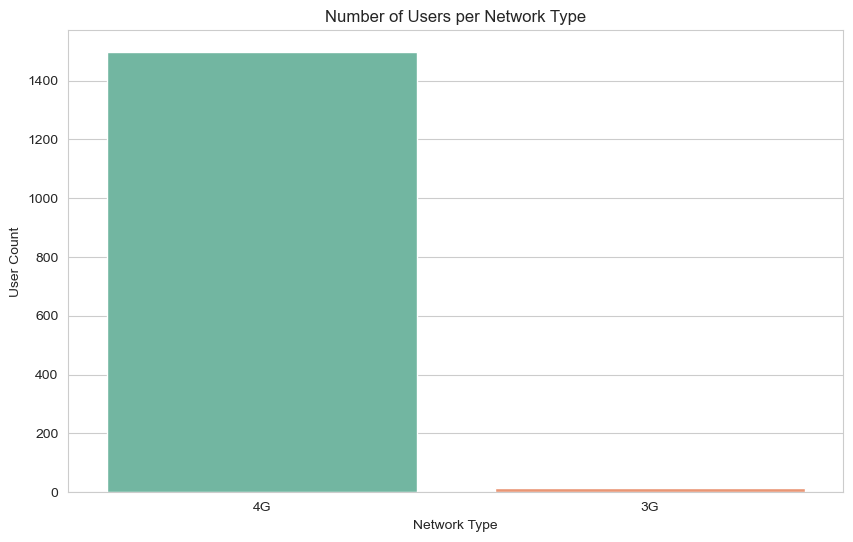

In [84]:
plt.figure(figsize=(10, 6))
df_network_count = df_cleaned["network"].value_counts().reset_index()
df_network_count.columns = ["network", "count"]

sns.barplot(
    data=df_network_count, 
    x="network", 
    y="count", 
    hue="network", 
    dodge=False,  
    palette="Set2",
    legend=False  
)

plt.title("Number of Users per Network Type")
plt.xlabel("Network Type")
plt.ylabel("User Count")
plt.show()

# "Pie Chart of Network Type Distribution"

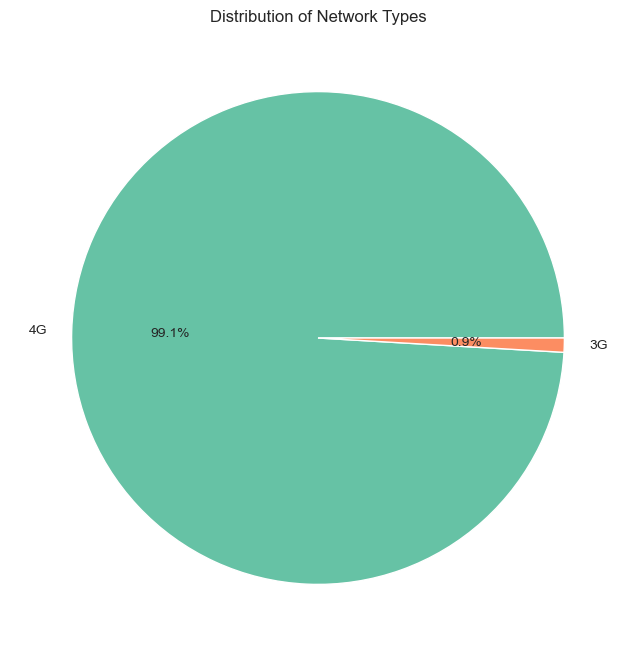

In [87]:
plt.figure(figsize=(8, 8))
plt.pie(df_network_count["count"], labels=df_network_count["network"], autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Distribution of Network Types")
plt.show()

# "Pie Chart of Test Distribution by Operator"

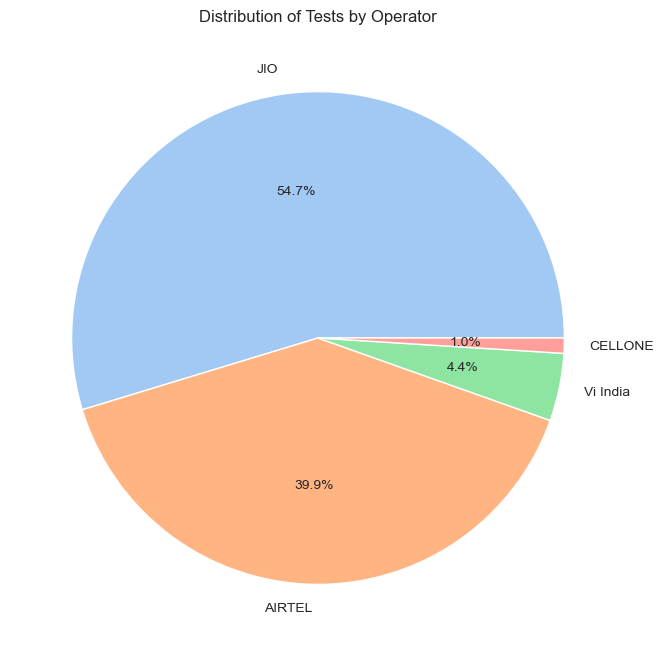

In [90]:
plt.figure(figsize=(8, 8))
df_operator_count = df_cleaned["operator"].value_counts().reset_index()
df_operator_count.columns = ["operator", "count"]
plt.pie(df_operator_count["count"], labels=df_operator_count["operator"], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Distribution of Tests by Operator")
plt.show()

# "Pie Chart of Test Distribution by Month"

# Distribution of Tests by Month 

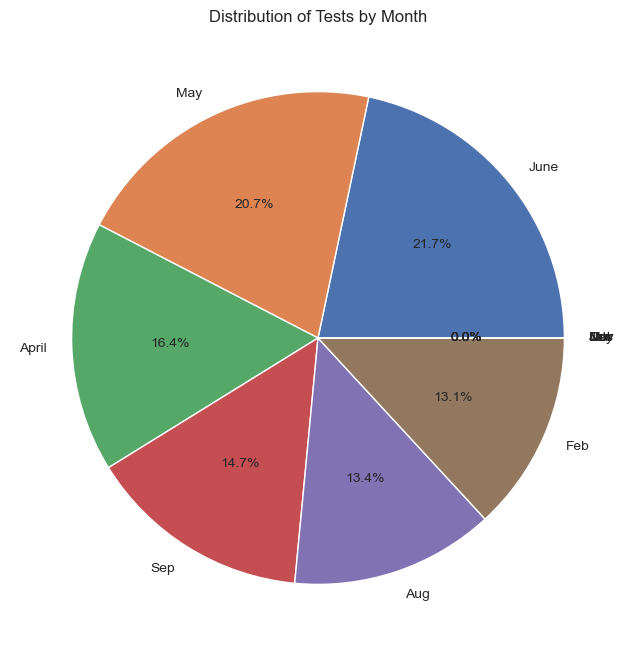

In [93]:
plt.figure(figsize=(8, 8))
df_month_count = df_cleaned["month"].value_counts().reset_index()
df_month_count.columns = ["month", "count"]
plt.pie(df_month_count["count"], labels=df_month_count["month"], autopct='%1.1f%%', colors=sns.color_palette("deep"))
plt.title("Distribution of Tests by Month")
plt.show()

# Speed Distribution by Operator

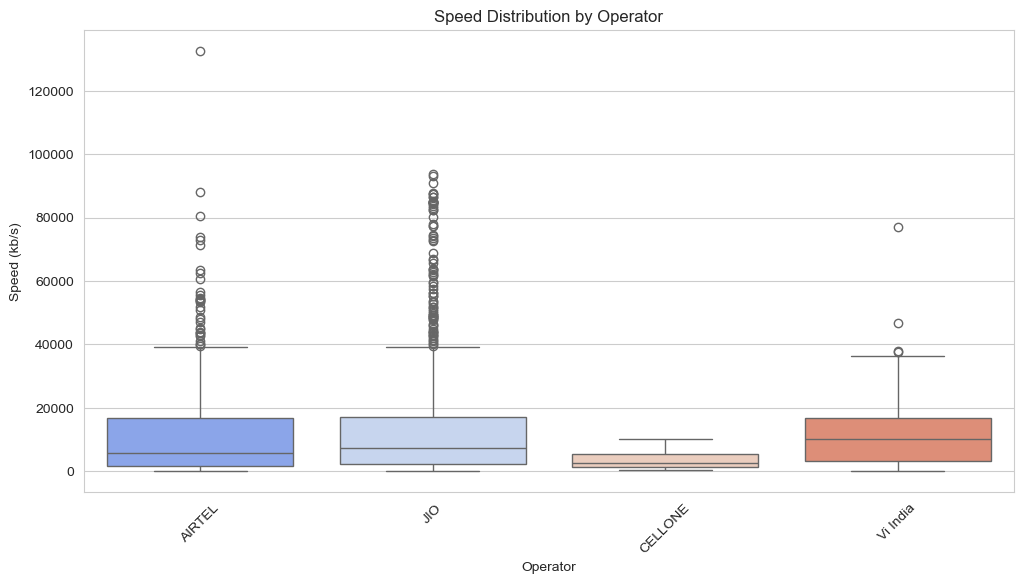

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="operator", y="kb/s", hue="operator", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Speed Distribution by Operator")
plt.xlabel("Operator")
plt.ylabel("Speed (kb/s)")
plt.show()

# Correlation Matrix Heatmap of Numeric Features

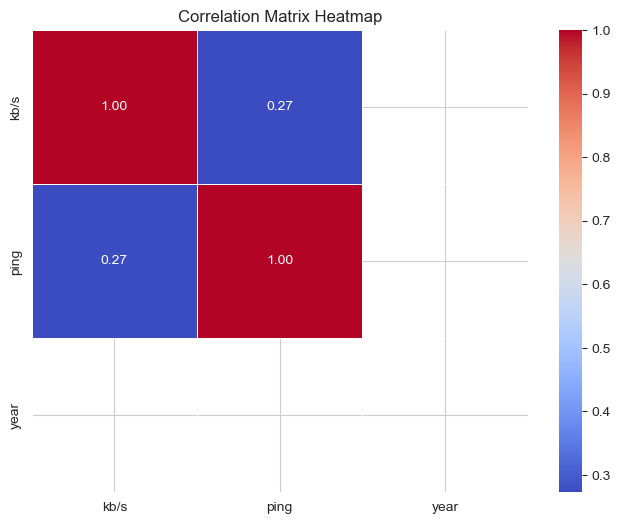

In [97]:
plt.figure(figsize=(8, 6))
numeric_df = df_cleaned.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Speed Distribution by Network Type (Strip Plot)

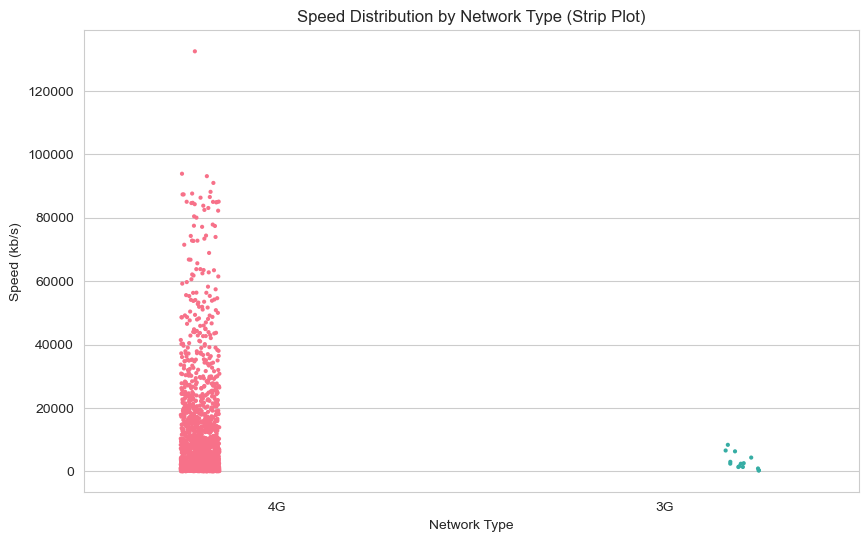

In [99]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_cleaned, x="network", y="kb/s", hue="network", dodge=True, palette="husl", size=3, legend=False)
plt.title("Speed Distribution by Network Type (Strip Plot)")
plt.xlabel("Network Type")
plt.ylabel("Speed (kb/s)")
plt.show()

 # Distribution of Speed (kb/s)"

 # This title indicates that the plot shows the distribution of speeds in kilobytes per second.

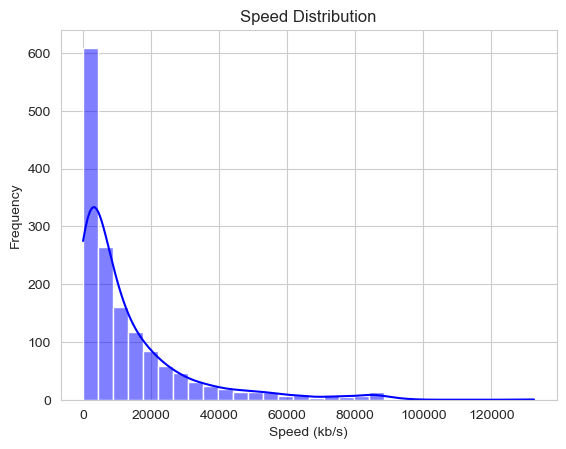

In [101]:
sns.histplot(df_cleaned["kb/s"], bins=30, kde=True, color="blue")
plt.xlabel("Speed (kb/s)")
plt.ylabel("Frequency")
plt.title("Speed Distribution")
plt.show()

# "Monthly Average Speed (kb/s)"

 # This title clearly indicates that the plot visualizes the average speed per month

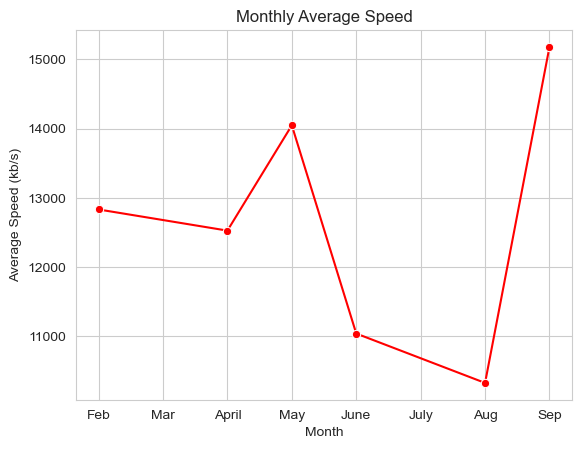

In [103]:
df_avg_speed = df_cleaned.groupby("month", observed=False)["kb/s"].mean().reset_index()
sns.lineplot(data=df_avg_speed, x="month", y="kb/s", marker="o", color="red")
plt.xlabel("Month")
plt.ylabel("Average Speed (kb/s)")
plt.title("Monthly Average Speed")
plt.show()

# Speed Distribution by Operator (Strip Plot)


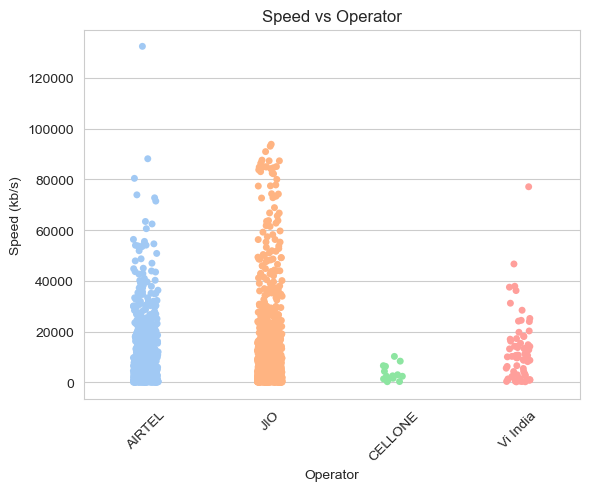

In [105]:
sns.stripplot(data=df_cleaned, x="operator", y="kb/s", hue="operator", jitter=True, palette="pastel", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Operator")
plt.ylabel("Speed (kb/s)")
plt.title("Speed vs Operator")
plt.show()

# Speed Distribution by Network Type

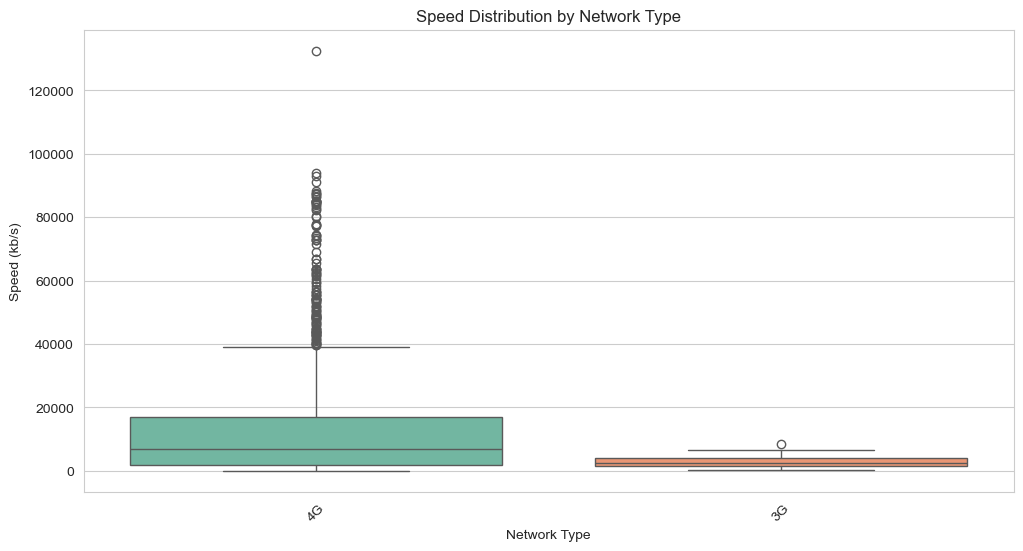

In [111]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="network", y="kb/s", hue="network", palette="Set2")
plt.xticks(rotation=45)
plt.title("Speed Distribution by Network Type")
plt.xlabel("Network Type")
plt.ylabel("Speed (kb/s)")
plt.show()

# Importing the SciPy Stats Module for Statistical Functions

In [107]:
import scipy.stats as stats

In [109]:
df_cleaned["speed_category"] = pd.qcut(df_cleaned["kb/s"], q=3, labels=["Low", "Medium", "High"])

In [ ]:
contingency_table = pd.crosstab(df_cleaned["month"], df_cleaned["speed_category"])

In [ ]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

In [ ]:
print("Chi-Square Statistic:", chi2_stat)

In [ ]:
print("Degrees of Freedom:", dof)

In [ ]:
print("P-value:", p_value)

In [ ]:
missing_values = df_cleaned.isnull().sum()
missing_percentage = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100


In [ ]:
print("Missing Values:\n", missing_values)
print("\nMissing Percentage:\n", missing_percentage)

In [ ]:
duplicate_count = df_cleaned.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_count)

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, y="kb/s")
plt.title("Outlier Detection in Speed (kb/s)")
plt.show()

## DATASET OBSERVATION

1. Data Cleaning and Exploration
The data was initially explored through df.describe() and df.info() to get a glimpse of numerical values and identify missing or inconsistent data. One important step was filling in missing values and deleting any unnecessary or corrupted entries to provide the correct results. The data was then cleaned by only considering necessary columns like operator, type of network, download speed, upload speed, and latency (ping).
2. Statistical Insights on Network Speed
The speed distribution was examined through histograms and boxplots. Histograms indicated that the majority of users had moderate speeds, with some extreme outliers, which would be either very slow or extremely fast connections. Boxplots indicated that some telecom operators performed better than others consistently, while others had very variable performance with wide swings in speed.
3. Comparative Analysis of Operators and Networks
One of the primary goals in this research was to evaluate the performance of various telecom operators. Boxplots and bar charts were created to graphically represent speed fluctuations between various operators, and line charts were employed to monitor monthly trends in network speeds. From the analysis, it was observed that certain operators regularly offered high speeds, but others had irregular performance levels, potentially owing to network congestion or hardware issues.
4. Trends in Performance Over Time and Regions
A time-series analysis was performed to examine how the network performance varied over the course of months. The outcomes revealed that network speeds varied according to various times of the year, perhaps as a function of traffic demand variation, seasonal upgrading of the network, or maintenance work. A correlation heatmap also evidenced that some areas of the country had superior network performance compared to others, likely as a function of infrastructure.
5. Key Findings from Visualizations
Various visualizations, such as scatter plots, line plots, and pie plots, were employed to emphasize the takeaways. The ping vs speed scatter plot illustrated that increased latency tended to result in decreased network speeds, as one would expect. A pie plot was also employed to illustrate the market share of various telecom operators, indicating which players dominated the data set.
Boxplots for various telecom operators revealed that some operators had a much greater variation in speeds, reflecting inconsistent quality of service. On the other hand, some operators had a more predictable and stable performance, which made them more reliable for customers. Another interesting fact was that some areas had much slower speeds than others, probably because of less infrastructure development or network overload.